<a href="https://colab.research.google.com/github/htb4hv/assignment3/blob/main/Ayush_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [ ]:
! git clone https://www.github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 7.28 MiB | 9.94 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv('/content/knn/data/car_data.csv', low_memory=False)
print(df.head())
print(df.shape)

df['Gender'] = df['Gender'].str.replace('Male', '0').str.replace('Female', '1').astype(int)
print(df.head())

summary = df.describe(include='all')
missing_values = df.isnull().sum()

summary, missing_values #summary listed, no missing values

X = df[['Age', 'AnnualSalary']]
y = df['Purchased']

# 1. MaxMin-normalize Age and AnnualSalary
X_normalized = X.copy()
X_normalized['Age'] = (X['Age'] - X['Age'].min()) / (X['Age'].max() - X['Age'].min())
X_normalized['AnnualSalary'] = (X['AnnualSalary'] - X['AnnualSalary'].min()) / (X['AnnualSalary'].max() - X['AnnualSalary'].min())

X_normalized.head()


#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html (used to learn how to apply the test train split)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


k_values = list(range(1, 50))
cv_scores = []
# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # using 5-fold cross-validation
    cv_scores.append(scores.mean())

optimal_k = k_values[cv_scores.index(max(cv_scores))]


knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

#Based on the confusion matrix, 106 instances were correctly classified as negative, 76 instances were correctly classified as positive.
#while 6 instances were wrongly classified as positive and 12 instances were wrongly classified as negative.


#create two categories for the female and male testing data.

X_test_male = X_test[df['Gender'][X_test.index] == 0]
y_test_male = y_test[X_test_male.index]

X_test_female = X_test[df['Gender'][X_test.index] == 1]
y_test_female = y_test[X_test_female.index]


#predict for each of the male and female category using the model we've established earlier.

y_pred_male = knn_optimal.predict(X_test_male)
y_pred_female = knn_optimal.predict(X_test_female)

#create the confusion matrix for both.

conf_matrix_male = confusion_matrix(y_test_male, y_pred_male)
conf_matrix_female = confusion_matrix(y_test_female, y_pred_female)

print(conf_matrix_male)
print(conf_matrix_female)


#the model predicts the target purchased category for males at a rate of 94.898% whereas it predicts the target purchased category for females at rougly 87.253%.
#however it is important to note that the sample size of the training data for the two groups are slighly different so the little discrepency in the prediction accuracy
# from the model does not seem significant from the human eye.

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
(1000, 5)
   User ID  Gender  Age  AnnualSalary  Purchased
0      385       0   35         20000          0
1      681       0   40         43500          0
2      353       0   49         74000          0
3      895       0   40        107500          1
4      661       0   25         79000          0
[[106   6]
 [ 12  76]]
[[59  1]
 [ 4 34]]
[[47  5]
 [ 8 42]]


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


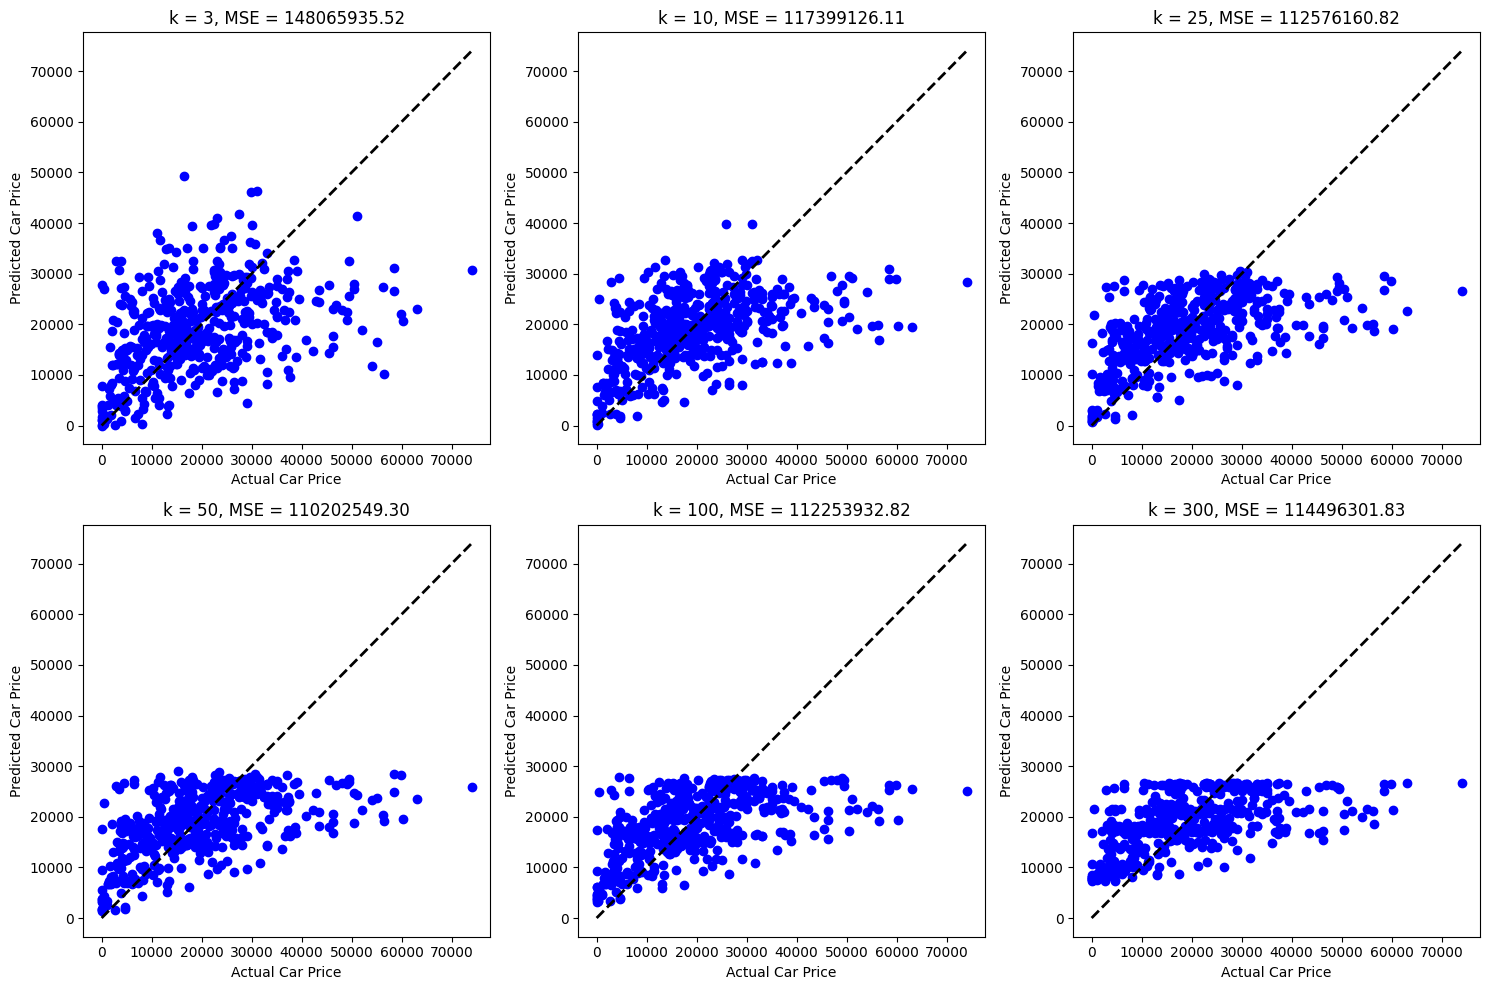

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df =  pd.read_csv('/content/knn/data/USA_cars_datasets.csv', low_memory=False)
df = df[['price','year','mileage']]
print(df.head())
print(df.shape)

summary = df.describe(include='all')
missing_values = df.isnull().sum()

#no missing values
X = df[['year', 'mileage']]
y = df['price']


X_normalized = X.copy()
X_normalized['year'] = (X['year'] - X['year'].min()) / (X['year'].max() - X['year'].min())
X_normalized['mileage'] = (X['mileage'] - X['mileage'].min()) / (X['mileage'].max() - X['mileage'].min())

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Specified k values
k_values = [3, 10, 25, 50, 100, 300]


mse_values = []

# create a page with the 6 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# allows you to work with the various subplots by simply indexing them as you would an array.
axes = axes.ravel()

for i, k in enumerate(k_values):
    # Training the k-NN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predicting the price on the test data
    predictions = knn.predict(X_test)

    # Compute the Mean Squared Error (MSE) for the predictions
    mse = mean_squared_error(y_test, predictions)
    mse_values.append(mse)

    # Plotting actual vs. predicted prices
    axes[i].scatter(y_test, predictions, color='blue')
    #used chatGPT to figure out how to flot this specific dotted line.
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes[i].set_title(f'k = {k}, MSE = {mse:.2f}')
    axes[i].set_xlabel('Actual Car Price')
    axes[i].set_ylabel('Predicted Car Price')

plt.tight_layout()
plt.show()

#Based on the mean squared value, k=50 is the most optimal k from the provided ks.

#When the k value was smaller, the model is more prone to noise and becomes heavily dependent on the noise of the data so it's overfitted, and therefore the results for the predicted and acutal price is not total accurate.
#for the k values that are in the middle of the smaller and larger values, those seem to have the better predictions when compared to the really small and large k values.
#for the larger k values, because the model is reluctant to listen to the noise within the training data, it's more overfitted, and therefore, the results become less accurate once again.


**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv('/content/knn/data/heart_failure_clinical_records_dataset.csv', low_memory=False)
missing_values = df.isnull().sum()
#no missing values to drop

df = df.drop(columns=['time'])


#correlation matrix
correlation_matrix = df.corr()
correlations_with_death_event = correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)
print(correlation_matrix)

#age, ejection_fraction, serum creatine, and serum sodium are correlated with the death column.

dummy_variables = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Compute summary table using each dummy variable
summary_tables = {}
for var in dummy_variables:
    summary = df.groupby(var)['DEATH_EVENT'].mean()
    summary_tables[var] = summary

print(summary_tables)
#anameia and high_blood_pressure being present within the individual seem to have a correlation with a death_event since those are the only
#categories where there's a discrepency between a death event or not given that specific condition is present.


#Based on the earlier findings, age, ejection_fraction, serum creatine, serum sodium, anameia, and high_blood_pressure have been selected that are predictive of death

X_selected = df[['age', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'anaemia', 'high_blood_pressure']]
y_selected = df['DEATH_EVENT']

print(X_selected.head())
print(y_selected.head())

#minmax using the scaler.fit_transform function
scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X_selected.to_numpy())
X_normalized = pd.DataFrame(X_normalized, columns=[
  'age', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'anaemia', 'high_blood_pressure'])

print(X_normalized.head())

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_selected, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

# Range of k values to test
k_values = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]

mean_squared_error_vals_1 = []

# Calculate the performance for each k
performance = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    accuracy = knn.score(X_test, y_test)
    performance[k] = accuracy
    mse = mean_squared_error(y_test, predictions)
    mean_squared_error_vals_1.append(mse)

#for the variables selected along with the k values (used the fibonacci sequence), k=2 seems to be the most optimal in this case.

# Define the predictor variables (all except DEATH_EVENT) and target variable
X_all = df.drop(columns=['DEATH_EVENT'])
y_all = df['DEATH_EVENT']

# MinMax normalization of predictors
new_scaler = MinMaxScaler()


X_all_normalized = new_scaler.fit_transform(X_all.to_numpy())
X_all_normalized = pd.DataFrame(X_all_normalized, columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking'])
print(X_all_normalized.head())


# Splitting the data (80% train, 20% test)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_normalized, y_all, test_size=0.2, random_state=42)

mean_squared_error_vals_2 = []


# Calculate the performance for each k for the complete feature set
performance_all = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_all, y_train_all)
    predictions = knn.predict(X_test_all)

    accuracy = knn.score(X_test_all, y_test_all)
    performance_all[k] = accuracy
    mse = mean_squared_error(y_test_all, predictions)
    mean_squared_error_vals_2.append(mse)

print(performance_all)
print(sum(mean_squared_error_vals_1))
print(sum(mean_squared_error_vals_2))
#k=2 was still the most accurate/helpful k to use even when using all of the columns to do the training and then testing it for accuracy on it's predictions.
#Although similar, the mean value square for the model using some of the variables that I selected compared to using every variable is lower. Therefore, I would choose
#to use the model where I picked the individual categories that I believed were a predictor of a death event. This also shows that more varibles are not always better when
#it comes to predicting a target because the inclusion of completely unrelated/correlated variables will just introduce more noise to the model when training and cause it to make decision on factors that are not related/important and actually harm it's performance.


                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  e

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

11490434/11490434 [==============================] - 0s 0us/step
7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  

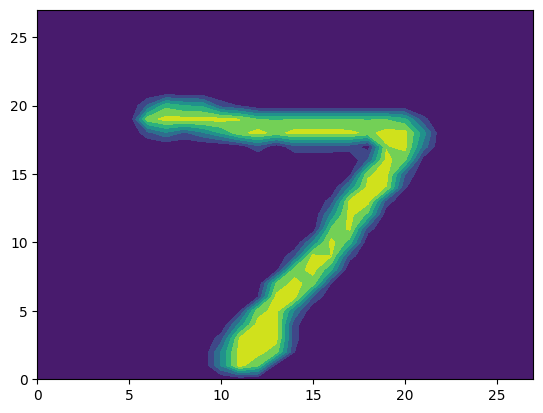

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

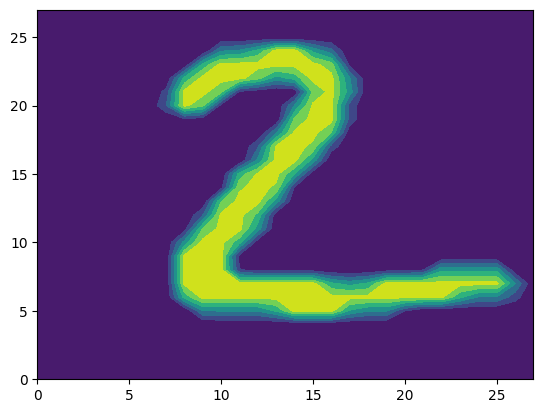

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

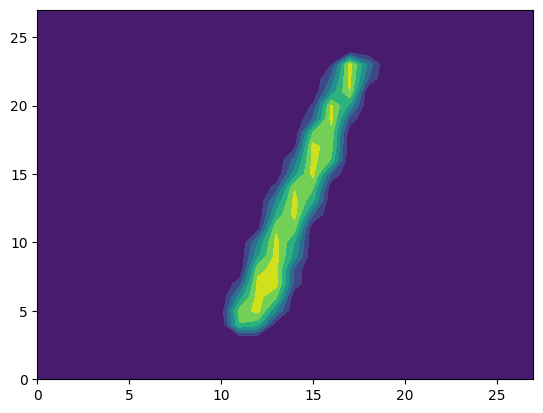

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

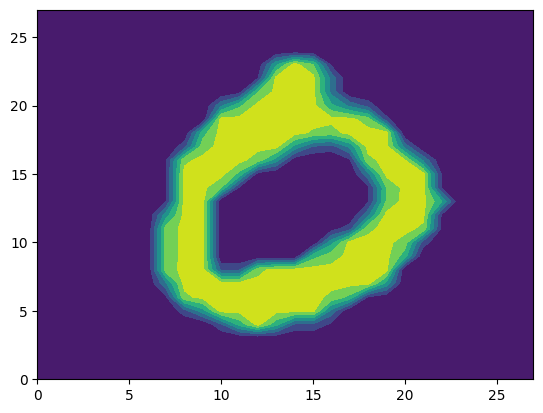

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

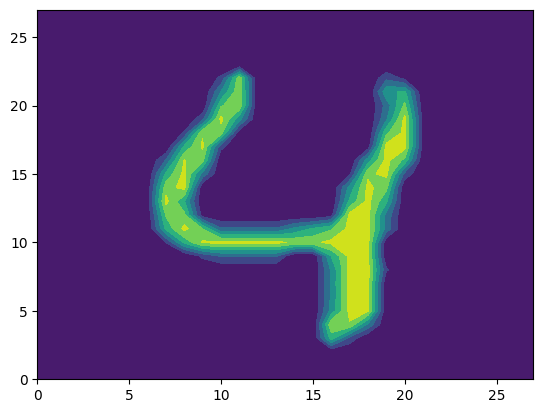

Shape of X_train
(60000, 28, 28)
Shape of X_test
(10000, 28, 28)
Shape of y_train
(60000,)
Shape of y_test
(10000,)
Shape of a single image in X_train: (28, 28)
Shape of a single image in X_test: (28, 28)
Accuracy for k=1: 0.9691
Accuracy for k=3: 0.9705
Accuracy for k=5: 0.9688
Accuracy for k=7: 0.9694
Accuracy for k=9: 0.9659
The optimal value of k is: 3


"\nA way to represent a colored image in matrix form is to simply represent a 3D array of size Height*Width*3, where the height is the height\nof the image, the width is the width itself and *3 is to represent the RBG value (Red, Green, Blue) at each pixel. A way to represent this matrix\nin tabular format is to simply flatten the 3D matrix into the array by extracting the RGB value at each pixel and storing that as the next elements within\nthe new created array. So start with the top left pixel, get the RBG values for it at that location and store those RBG value as the first three elements within\nthe new 1d array, and move on to the next pixel location within the matrix, repeat the same process of extracting the RGB values and storing them as the next 3 elements in\nthe flattened array, so for a 10*10*3 matrix for a colored image, it's corresponding flattended tabular form will be a 1d array of size 300. In this way, we can represent any\ncolored image in tabluar form, and perform 

In [5]:
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test


import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

print("Shape of X_train")
print(X_train.shape)
print("Shape of X_test")
print(X_test.shape)
print("Shape of y_train")
print(y_train.shape)
print("Shape of y_test")
print(y_test.shape)
print("Shape of a single image in X_train:", X_train[0].shape)
print("Shape of a single image in X_test:", X_test[0].shape)

X_train_reshaped = X_train.reshape(60000, 784)
X_test_reshaped = X_test.reshape(10000, 784)


k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reshaped, y_train)

    y_pred = knn.predict(X_test_reshaped)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for k={k}: {acc:.4f}")

optimal_k = k_values[np.argmax(accuracies)]
print(f"The optimal value of k is: {optimal_k}")


"""
A way to represent a colored image in matrix form is to simply represent a 3D array of size Height*Width*3, where the height is the height
of the image, the width is the width itself and *3 is to represent the RBG value (Red, Green, Blue) at each pixel. A way to represent this matrix
in tabular format is to simply flatten the 3D matrix into the array by extracting the RGB value at each pixel and storing that as the next elements within
the new created array. So start with the top left pixel, get the RBG values for it at that location and store those RBG value as the first three elements within
the new 1d array, and move on to the next pixel location within the matrix, repeat the same process of extracting the RGB values and storing them as the next 3 elements in
the flattened array, so for a 10*10*3 matrix for a colored image, it's corresponding flattended tabular form will be a 1d array of size 300. In this way, we can represent any
colored image in tabluar form, and perform further analyis or apply machine learning algorithms to it.
"""

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?